## Analyze the whole-brain voxel-wise GLM results

The numbering of the COPEs:


- 17 EVs:
    1. stim_easy
    2. stim_hard
    3. cue_payoff
    4. cue_neutral
    5. response_left
    6. response_right
    7. error
    8. STN L
    9. STN R
    10. STN L\*easy
    11. STN L\*hard
    12. STN L\*payoff
    13. STN L\*neutral
    14. STN R\*easy
    15. STN R\*hard
    16. STN R\*payoff
    17. STN r\*neutral
- The actual constrasts of interest:
    18. (STN R \* Hard) - (STN R \* Easy)
    19. (STN L \* Hard) - (STN L \* Easy)
    20. (STN R \* Payoff) - (STN R \* Neutral)
    21. (STN L \* Payoff) - (STN L \* Neutral)

Second level:
1. Intercept
2. Dataset
3. -Intercept
3. -Dataset

In [3]:
first_level_copes = {#'stim_easy': 1,
#                      'stim_hard': 2,
#                      'cue_left': 3,
#                      'cue_right': 4,
#                      'cue_neutral': 5,
#                      'response_left': 6,
#                      'response_right': 7,
#                      'error': 8,
#                      'cue': 9,
#                      'stim': 10,
#                      'response': 11,
#                      'cue_payoff - cue_neutral': 12,
#                      'stim_hard - stim_easy': 13,
#                      'response_left - response_right': 14,
#                      'cue_left - cue_right': 15,
                     'stnl': 8,
                     'stnr': 9,
                     'stnl_hard - stnl_easy': 18,
                     'stnl_payoff - stnl_neutral': 19,
                     'stnr_hard - stnr_easy': 20,
                     'stnr_payoff - stnr_neutral': 21,
}

second_level_copes = {'intercept': 1,
                      'dataset': 2,
                      '-intercept': 3,
                      '-dataset': 4}

In [4]:
import nistats
import nibabel as nib
import nilearn
from nilearn import image
from nistats.first_level_model import FirstLevelModel
from nistats.second_level_model import SecondLevelModel
from nistats.thresholding import map_threshold
from nilearn.plotting import plot_stat_map
from nilearn import plotting
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import re
import pickle as pkl

mni09c = '/home/stevenm/Templates/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c/mni_icbm152_t1_tal_nlin_asym_09c_brain.nii'

%matplotlib inline

In [5]:
def merge_pos_neg(pos, neg):
    return image.math_img('pos-neg', pos=pos, neg=neg)

In [6]:
def get_second_level_zmap(first_level_contrast, second_level_contrast, thresholding=None, 
                          base_dir='./derivatives/both/glm_ppi_level3'):
    cope1 = first_level_copes[first_level_contrast]
    cope2 = second_level_copes[second_level_contrast]

    gfeat_dir = os.path.join(base_dir, 'cope{}.gfeat').format(cope1)
    
    if thresholding is None:
        nii = nib.load(os.path.join(gfeat_dir, 'cope1.feat', 'stats', 'zstat{}.nii.gz').format(cope2))
        threshold = 0
    elif thresholding == 'fwer' or thresholding == 'cluster':
        nii_pos = os.path.join(gfeat_dir, 'cope1.feat', 'thresh_zstat{}.nii.gz').format(cope2)
        neg_contrast = cope2+2
        nii_neg = os.path.join(gfeat_dir, 'cope1.feat', 'thresh_zstat{}.nii.gz').format(neg_contrast)
        nii = merge_pos_neg(nii_pos, nii_neg)
        threshold = np.min(nib.load(nii_pos).get_data())
        
    elif thresholding == 'fdr':
        nii = nib.load(os.path.join(gfeat_dir, 'cope1.feat', 'stats', 'zstat{}.nii.gz').format(cope2))
        _, threshold = map_threshold(nii, alpha=0.05, height_control='fdr')

    return nii, threshold

In [7]:
def plot_4x4(z_map, n_cuts=16, **kwargs):
    cols = rows = int(np.sqrt(n_cuts))
    
    gridspec = dict(hspace=0.0, wspace=0.0, width_ratios=[1, 1, 1, 1])
    f, axes = plt.subplots(4, 4, gridspec_kw=gridspec)
    ax = axes.ravel()
    
    cut_coords = nilearn.plotting.find_cut_slices(z_map, direction='z', n_cuts=n_cuts)
    
    if(z_map.get_data().sum() == 0):
        print('No non-zero z-values, nothing to plot!')
        return f, ax
    
    for i in range(n_cuts):
        # plot colorbar in right-most column
        if ((i+1)/cols % cols) == int(((i+1)/cols % cols)):
            colorbar = True
        else:
            colorbar = False
        
        if i == 0 and 'title' in kwargs.keys():
            title = kwargs.pop('title')
        else:
            title = None
        
        plotting.plot_stat_map(z_map, display_mode='z', colorbar=colorbar, title=title,
                               cut_coords=[cut_coords[i]], figure=f, axes=ax[i], **kwargs)
        
    f.set_size_inches(15,15)
    return f, ax

# plot_4x4(z_map1, threshold=threshold, bg_img=mni09c, title='Test title')

## Contrast-of-interest 1: (STN L Hard) - (STN L Easy)

No non-zero z-values, nothing to plot!


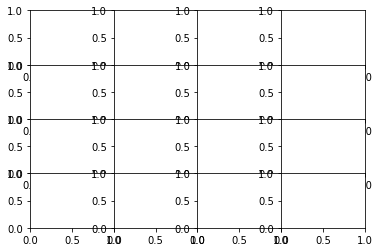

In [49]:
z_map_fwer, threshold = get_second_level_zmap('stnl_hard - stnl_easy', 'intercept', 'fwer')

f, ax = plot_4x4(z_map_fwer, threshold=0, bg_img=mni09c, title='STN L Hard > STN L Easy (intercept)')

## nothing found. What does it look like sub-threshold?

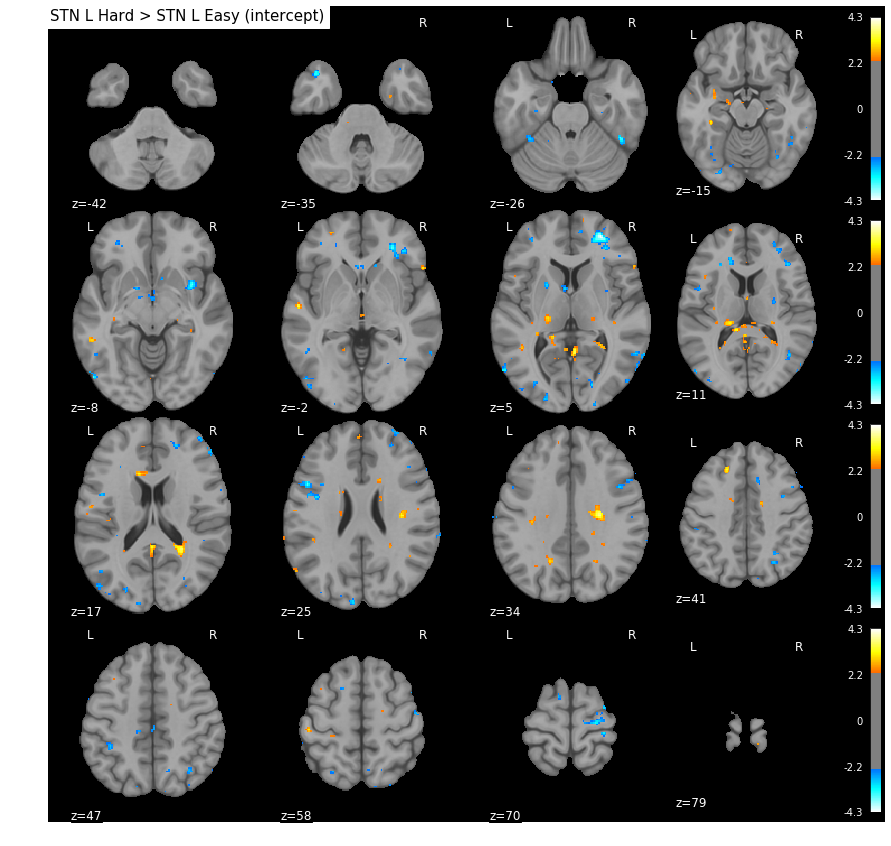

In [60]:
z_map, threshold = get_second_level_zmap('stnl_hard - stnl_easy', 'intercept', None)
f, ax = plot_4x4(z_map, threshold=2.3, bg_img=mni09c, title='STN L Hard > STN L Easy (intercept)')

## Contrast-of-interest 2: (STN L Payoff) - (STN L Neutral)

No non-zero z-values, nothing to plot!


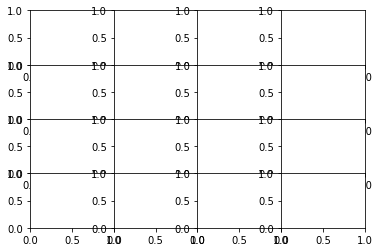

In [51]:
z_map_fwer, threshold = get_second_level_zmap('stnl_payoff - stnl_neutral', 'intercept', 'fwer')
f, ax = plot_4x4(z_map_fwer, threshold=threshold, bg_img=mni09c, title='STN L Payoff - STN L Neutral (intercept)')

## Sub-threshold?

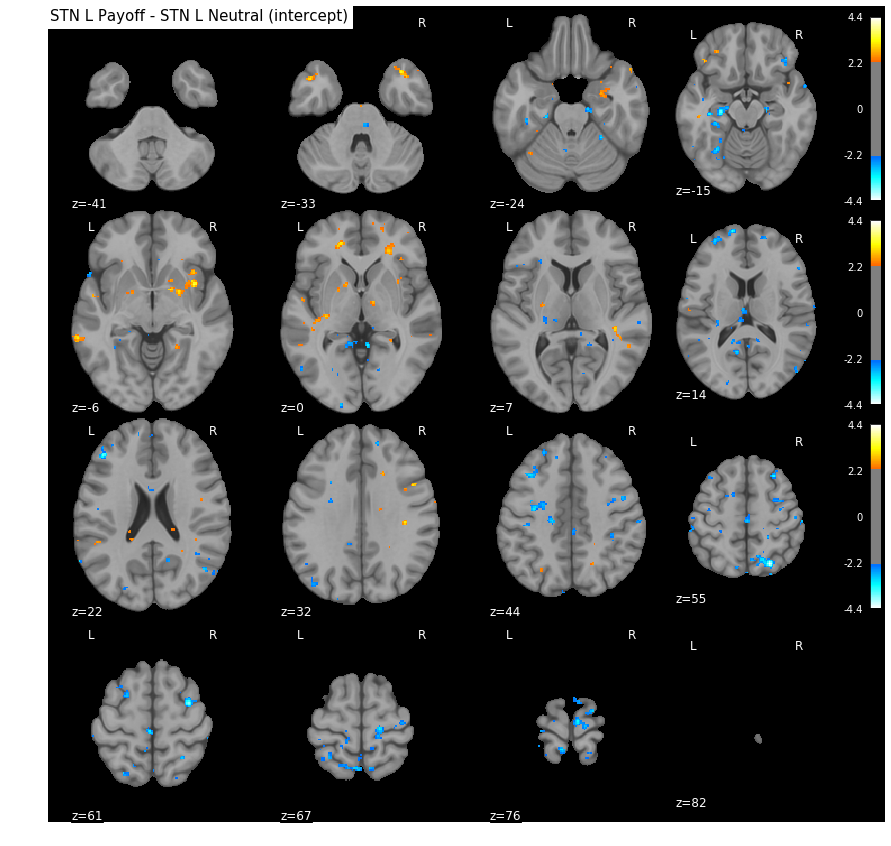

In [59]:
z_map, threshold = get_second_level_zmap('stnl_payoff - stnl_neutral', 'intercept', None)
f, ax = plot_4x4(z_map, threshold=2.3, bg_img=mni09c, title='STN L Payoff - STN L Neutral (intercept)')

## Contrast-of-interest 3: (STN R Hard) - (STN R Easy)

No non-zero z-values, nothing to plot!


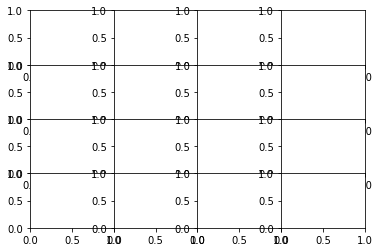

In [53]:
z_map_fwer, threshold = get_second_level_zmap('stnr_hard - stnr_easy', 'intercept', 'fwer')

f, ax = plot_4x4(z_map_fwer, threshold=0, bg_img=mni09c, title='STN R Hard > STN R Easy (intercept)')

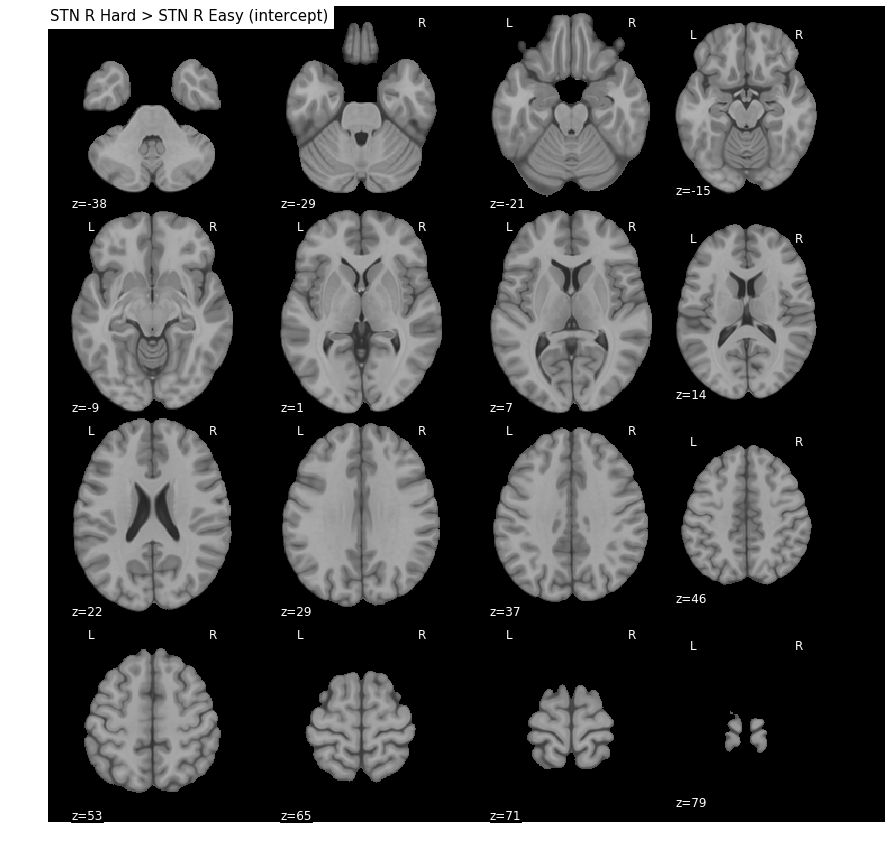

In [54]:
z_map_fdr, threshold = get_second_level_zmap('stnr_hard - stnr_easy', 'intercept', 'fdr')

f, ax = plot_4x4(z_map_fdr, threshold=threshold, bg_img=mni09c, title='STN R Hard > STN R Easy (intercept)')

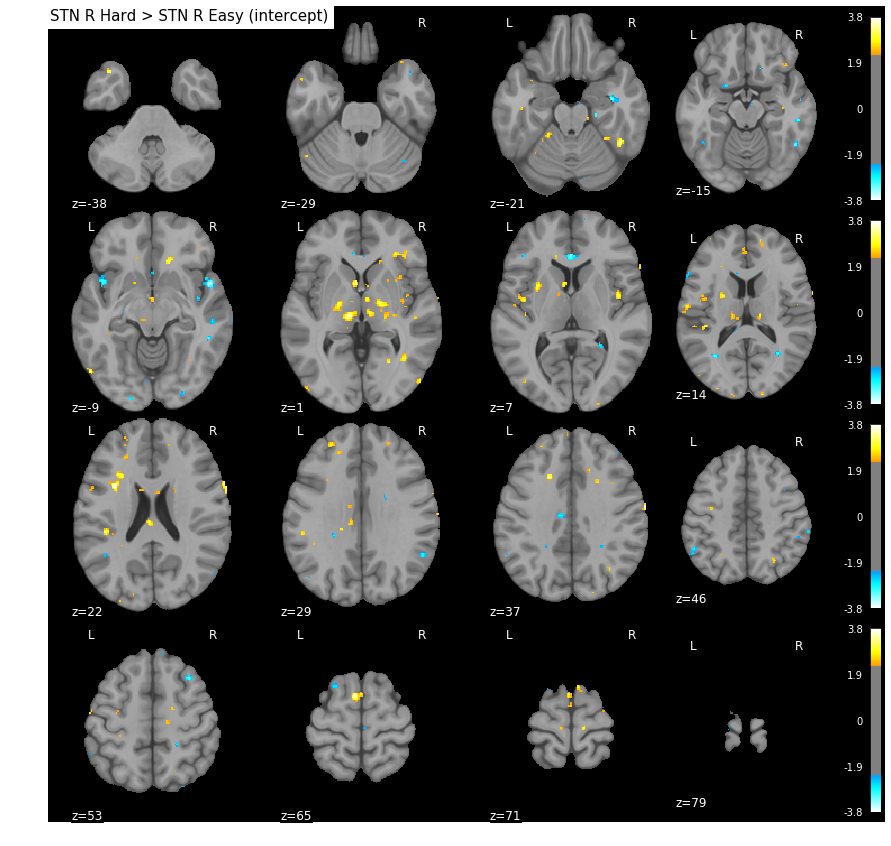

In [61]:
z_map, threshold = get_second_level_zmap('stnr_hard - stnr_easy', 'intercept', None)

f, ax = plot_4x4(z_map, threshold=2.3, bg_img=mni09c, title='STN R Hard > STN R Easy (intercept)')

## Contrast-of-interest 4: (STN R Payoff) - (STN R Neutral)

No non-zero z-values, nothing to plot!


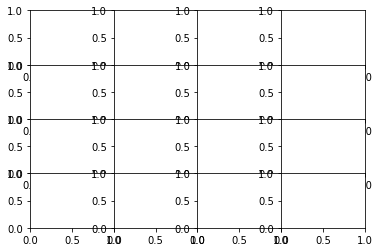

In [40]:
z_map_fwer, threshold = get_second_level_zmap('stnr_payoff - stnr_neutral', 'intercept', 'fwer')
f, ax = plot_4x4(z_map_fwer, threshold=threshold, bg_img=mni09c, title='STN R Payoff - STN R Neutral (intercept)')

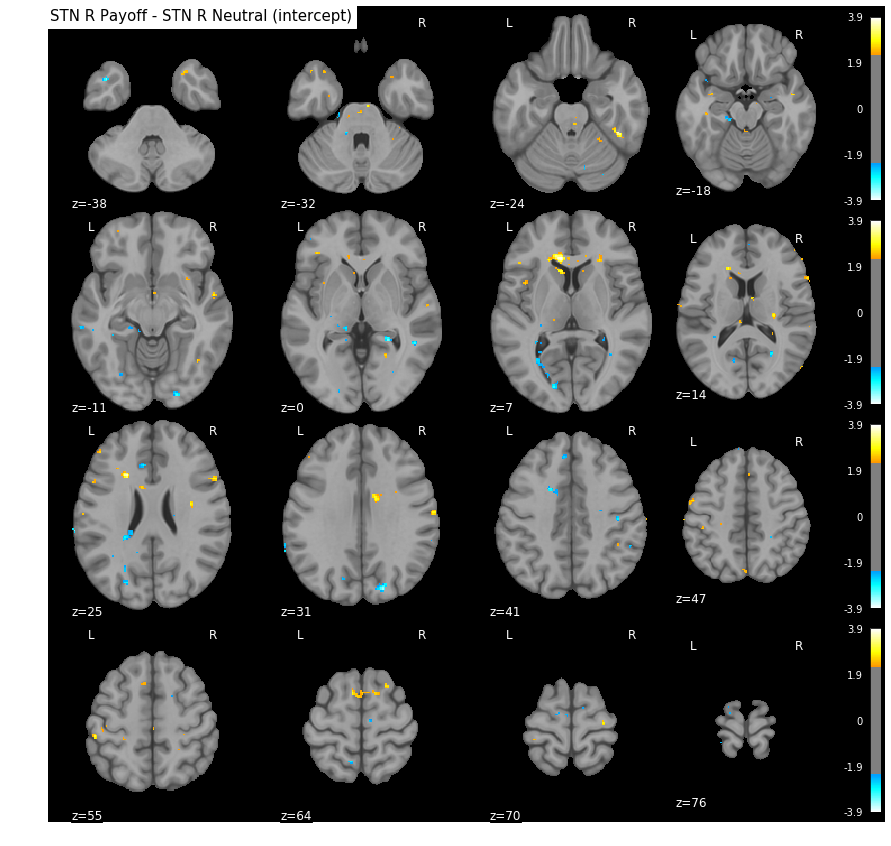

In [62]:
z_map, threshold = get_second_level_zmap('stnr_payoff - stnr_neutral', 'intercept', None)
f, ax = plot_4x4(z_map, threshold=2.3, bg_img=mni09c, title='STN R Payoff - STN R Neutral (intercept)')

# Exploratory 1: STN L?

In [ ]:
z_map_fwer, threshold = get_second_level_zmap('stnl', 'intercept', 'fwer')
f, ax = plot_4x4(z_map_fwer, threshold=threshold, bg_img=mni09c, title='STN L (intercept)')

/home/stevenm/.conda/envs/python3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)


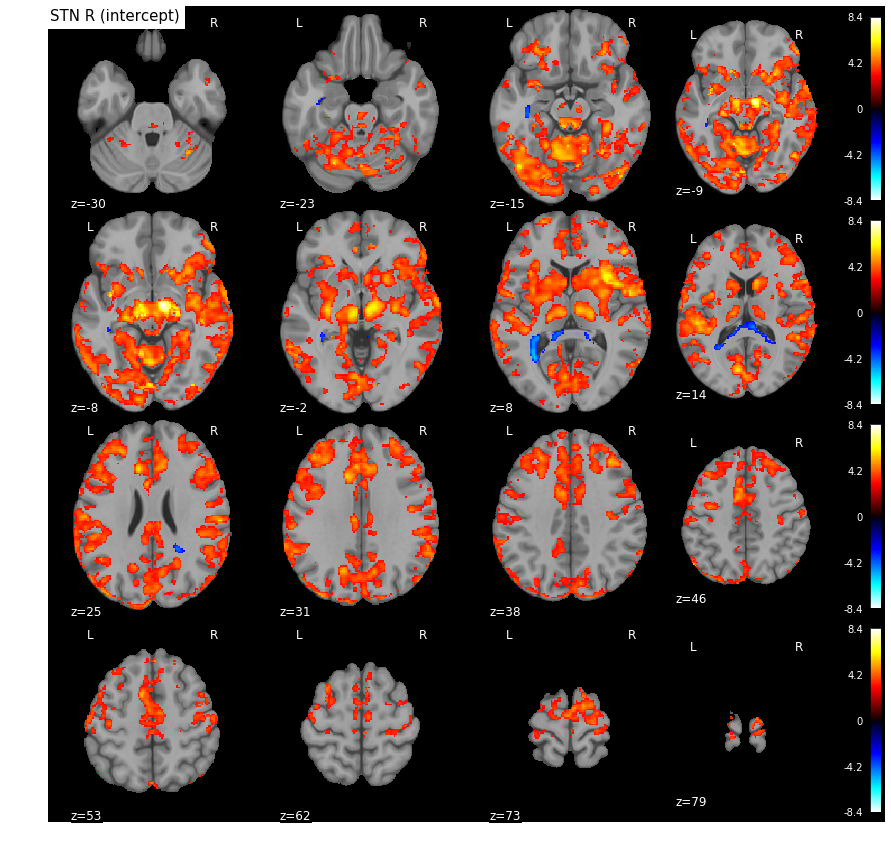

In [9]:
z_map_fwer, threshold = get_second_level_zmap('stnr', 'intercept', 'fwer')
f, ax = plot_4x4(z_map_fwer, threshold=threshold, bg_img=mni09c, title='STN R (intercept)')